# Ch2. Linear Regression

## Batch Gradient Descent 선형회귀모형

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

from warnings import filterwarnings
filterwarnings('ignore')

In [28]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston['feature_names'])
boston_df['PRICE'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.4, random_state=123)

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
lr.intercept_

25.011405223296446

In [34]:
np.round(lr.coef_, decimals=1)

array([ -0.1,   0. ,   0.1,   0.4, -13.8,   4.9,  -0. ,  -1.2,   0.3,
        -0. ,  -0.9,   0. ,  -0.5])

In [35]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
rmse

5.097391401613343

In [36]:
r2 = r2_score(y_test, y_preds)
r2

0.6946280874142776

In [37]:
y_train_preds = lr.predict(X_train) #Resubsitution Error > Train과 Test에서의 차이가 클수록 Overfitting의 정도로 볼 수 있다.
mse_train = mean_squared_error(y_train, y_train_preds)
rmse_train = np.sqrt(mse_train)
rmse_train

4.534939011357761

In [38]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
kfid = kf.split(X_data)

In [39]:
kf_mse = []
for train_i, test_i in kfid:
    X_trn, X_tst = X_data.iloc[train_i], X_data.iloc[test_i]
    y_trn, y_tst = y_target.iloc[train_i], y_target.iloc[test_i]
    lr = LinearRegression()
    lr.fit(X_trn, y_trn)
    y_preds = lr.predict(X_tst)
    mse = mean_squared_error(y_tst, y_preds)
    kf_mse.append(mse)

kf_mse

[22.137277553649348,
 24.382743689408098,
 24.819151911159757,
 20.05741727617246,
 23.01102051664526]

In [40]:
kf_rmse = np.sqrt(kf_mse)
np.mean(kf_rmse)

4.780065789218034

In [41]:
r2_train = r2_score(y_train, y_train_preds)
r2_train

0.7546781709705461

In [42]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
rmse_scores

array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405])

In [43]:
np.mean(rmse_scores) #다른 방식으로 구한 test 평가지표

5.828658946215815

## SGDRegressor(확률적 경사하강법) 선형회귀모형

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bX = boston['data']
bY = boston['target']
scaler.fit(bX)
boston_X_scaled = scaler.transform(bX)
np.round(boston_X_scaled[:3], decimals=2)

array([[-0.42,  0.28, -1.29, -0.27, -0.14,  0.41, -0.12,  0.14, -0.98,
        -0.67, -1.46,  0.44, -1.08],
       [-0.42, -0.49, -0.59, -0.27, -0.74,  0.19,  0.37,  0.56, -0.87,
        -0.99, -0.3 ,  0.44, -0.49],
       [-0.42, -0.49, -0.59, -0.27, -0.74,  1.28, -0.27,  0.56, -0.87,
        -0.99, -0.3 ,  0.4 , -1.21]])

In [45]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(boston_X_scaled, bY)
print(sgd_reg.intercept_, np.round(sgd_reg.coef_, decimals=1), sep='\n')

[22.79748523]
[-0.7  0.9  0.3  1.1 -2.2  3.4  0.1 -3.5  2.8 -1.8 -2.   0.9 -4.3]


In [46]:
import numpy as np
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100,1)
X_b = np.hstack([np.ones((100,1)), X])

print(X_b[:5], Y[:5], sep='\n')

[[1.         0.91686285]
 [1.         1.45001215]
 [1.         1.14857515]
 [1.         1.33442467]
 [1.         1.55409857]]
[[ 4.66647561]
 [10.07473311]
 [ 7.15827793]
 [ 8.29060293]
 [ 8.61678347]]


In [47]:
X_new = np.array([[0], [2]])
X_new_b = np.hstack([np.ones((2,1)), X_new])
print(X_new, X_new_b, sep='\n')

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]


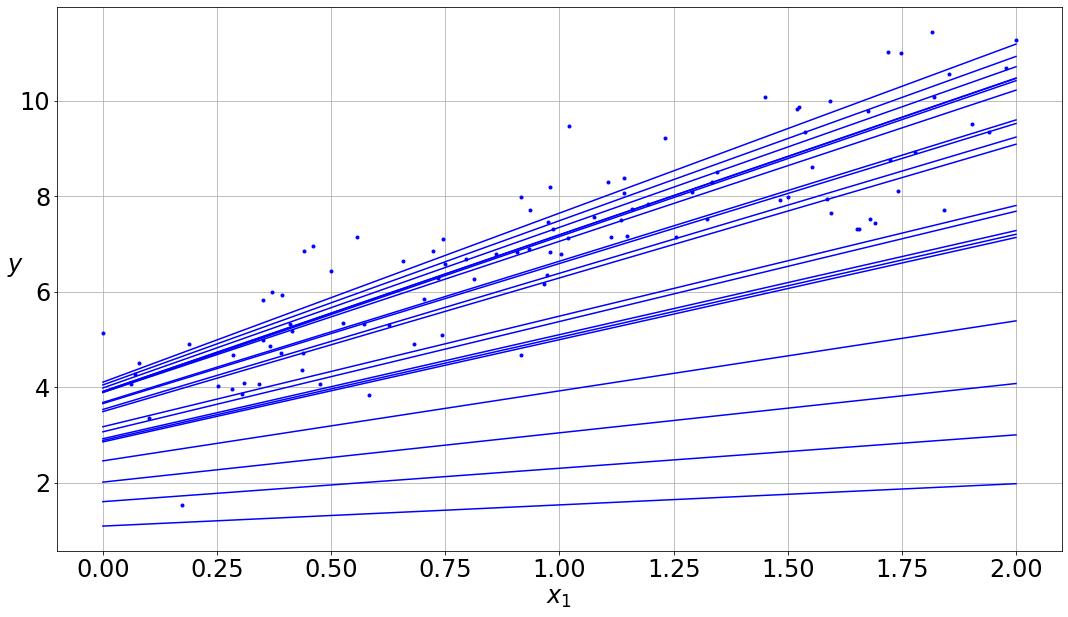

In [48]:
theta_path_sgd = []
m = len(X_b) #데이터의 길이 (벡터 행 갯수)
np.random.seed(42)

n_epochs = 50
eta = 0.05
theta = np.random.randn(2, 1)

plt.figure(figsize=(18,10), facecolor='w')
plt.plot(X, Y, 'b.')
plt.xlabel("$x_1$", fontsize=24)
plt.ylabel("$y$", rotation=0, fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()

for epoch in range(n_epochs):
    for i in range(m):

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        
        gradients = 2 * xi.T @ (xi @ theta - yi)

        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
        if epoch == 0 and i < 20:
            y_predict = X_new_b @ theta
            plt.plot(X_new, y_predict, 'b-')


In [49]:
theta_path_sgd[-1] #이건 계속 학습하며 변화한 Theta의 최종값이다~

array([[3.88454466],
       [2.93862814]])